In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
from preprocess import merge_parquets, sample_dat, drop_missing_vals

In [3]:
dir = '../data'  
dat = merge_parquets(dir)

In [7]:
sampled_dat = sample_dat(dat, 0.3)  # 30% of the data
sampled_dat = sampled_dat.dropna(subset=['total_amount', 'passenger_count', 'trip_distance']) #cleaning
sampled_dat['passenger_count'] = sampled_dat['passenger_count'].astype(int) # converting to integer type

In [9]:
#impact of passenger count on total fare 
fare_analysis = sampled_dat.groupby('passenger_count')['total_amount'].agg(['mean', 'median', 'count']).reset_index()

In [11]:
print("Impact of Passenger Count on Total Fare:")
print(fare_analysis)

Impact of Passenger Count on Total Fare:
   passenger_count        mean   median    count
0                0   25.456137   19.500   174722
1                1   27.649038   20.640  8344169
2                2   31.291376   21.840  1685758
3                3   30.677368   21.700   418135
4                4   32.437352   22.300   237320
5                5   28.153942   21.000   144522
6                6   27.755308   20.790    95246
7                7   88.565714   93.380       28
8                8   93.735972   99.845       72
9                9  112.227143  112.800       14


   passenger_count       mean  median    count
0                1  27.658898   20.64  8349694
1                2  31.315883   21.84  1681584
2                3  30.642282   21.70   417844
3                4  32.402561   22.32   236830
4                5  28.082025   20.93   144705
5                6  27.954247   21.00    95135


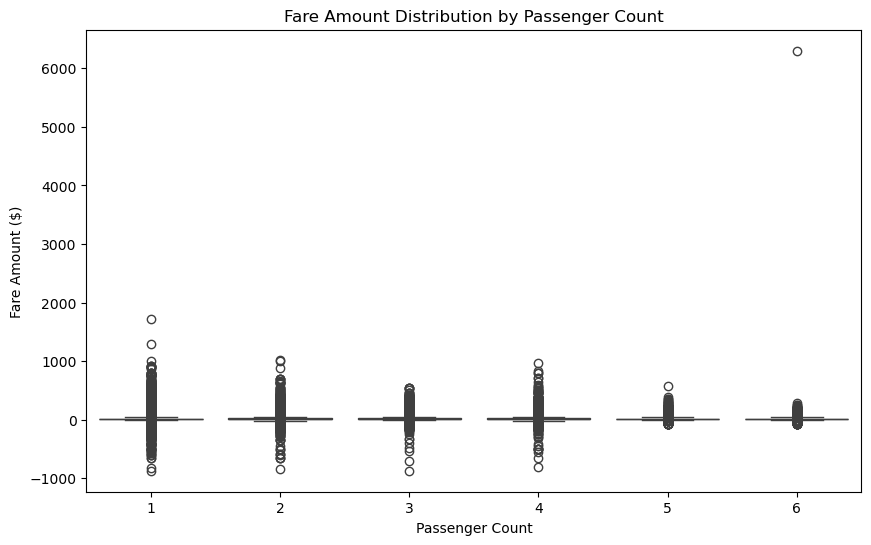

In [39]:
sampled_dat = sampled_dat[~sampled_dat['passenger_count'].isin([0,7, 8, 9])]
fare_analysis = sampled_dat.groupby('passenger_count')['total_amount'].agg(['mean', 'median', 'count']).reset_index()
print(fare_analysis)
# Visualization: Box plot for fare_amount across passenger counts
plt.figure(figsize=(10, 6))
sns.boxplot(data=sampled_dat, x='passenger_count', y='fare_amount')
plt.title('Fare Amount Distribution by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()